In [1]:
import datetime

import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('./output/v2.csv', index_col=0)
df.head()

,date,quantity,suppliers_currency,transformer_unit_price,dry_or_oil,rated_power_kVA,primary_winding,secondary_winding,no_load_loss,full_load_loss_75,full_load_loss_120,rated_volt_primary_side
0,2021-04-28,6.0,EUR,708000.0,Oil,19080.0,Copper,Copper,19002.544911,150154.155650,187698.233981,33000.0
3,2023-03-14,4.0,EUR,235000.0,Oil,11000.0,Copper,Copper,11825.516231,89149.546166,108715.888044,20000.0
8,2021-09-30,5.0,EUR,267000.0,Oil,12000.0,Copper,Copper,8000.000000,138000.000000,146000.000000,21000.0
9,2021-09-30,5.0,EUR,267000.0,Oil,12000.0,Copper,Copper,8000.000000,138000.000000,146000.000000,24000.0
10,2020-12-02,1.0,EUR,56200.0,Dry,5000.0,Aluminum,Aluminum,5000.000000,53043.000000,61000.000000,11000.0


In [6]:
df = pd.get_dummies(df, columns=['suppliers_currency', 'dry_or_oil', 'primary_winding', 'secondary_winding']).copy()

In [7]:
df.columns

Index(['date', 'quantity', 'transformer_unit_price', 'rated_power_kVA',
       'no_load_loss', 'full_load_loss_75', 'full_load_loss_120',
       'rated_volt_primary_side', 'suppliers_currency_EUR', 'dry_or_oil_Dry',
       'dry_or_oil_Oil', 'primary_winding_Aluminum', 'primary_winding_Copper',
       'secondary_winding_Aluminum', 'secondary_winding_Copper'],
      dtype='object')

In [82]:
chosen_columns = [
    'rated_power_kVA', 
    # 'no_load_loss', 
    # 'full_load_loss_75',
    # 'full_load_loss_120',
    'rated_volt_primary_side',
    'dry_or_oil_Dry',
    'dry_or_oil_Oil',
    # 'primary_winding_Aluminum',
    # 'primary_winding_Copper',
    # 'secondary_winding_Aluminum',
    # 'secondary_winding_Copper'
]

# y = df['transformer_unit_price']
y = df['transformer_unit_price'] / df['transformer_unit_price'].mean()
X = df[chosen_columns].astype(float)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     transformer_unit_price   R-squared:                       0.501
Model:                                OLS   Adj. R-squared:                  0.486
Method:                     Least Squares   F-statistic:                     33.42
Date:                    Sat, 19 Oct 2024   Prob (F-statistic):           4.77e-15
Time:                            01:21:19   Log-Likelihood:                -127.33
No. Observations:                     104   AIC:                             262.7
Df Residuals:                         100   BIC:                             273.2
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

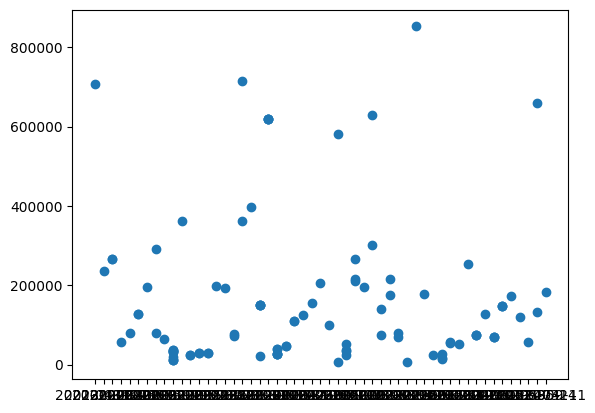

In [8]:
plt.scatter(
    df['date'],
    df['transformer_unit_price']
)

In [38]:
df['year'] = df['date'].apply(lambda x: datetime.datetime.fromisoformat(x).year)
df['month'] = df['date'].apply(lambda x: datetime.datetime.fromisoformat(x).month)

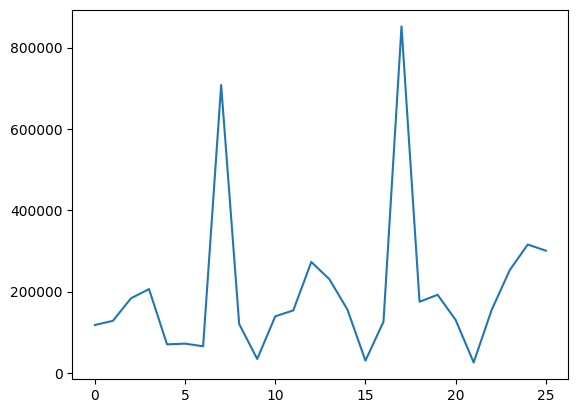

In [48]:
plt.plot(pd.DataFrame(df.groupby(['year', 'month'])['transformer_unit_price'].mean()).reset_index(drop=True))